## Lab 1_W5 - EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
#Loading data
df_amazon = pd.read_csv("amz_uk_price_prediction_dataset.csv")

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**1 - Frequency Tables**:
    

In [4]:
df_amazon.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
#- Generate a frequency table for the product `category`.
frequency_table = pd.crosstab(index=df_amazon['category'], columns='count').sort_values(by='count',ascending=False)
frequency_table

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Motorbike Chassis,107
Plugs,107
Alexa Built-In Devices,107


In [6]:
#- Which are the top 5 most listed product categories?
top5 = frequency_table.head()
top5

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


**2 - Visualizations**

C:\Users\ndemb\AppData\Local\Temp\ipykernel_23988\3266117306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5['count'], palette="Set3")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

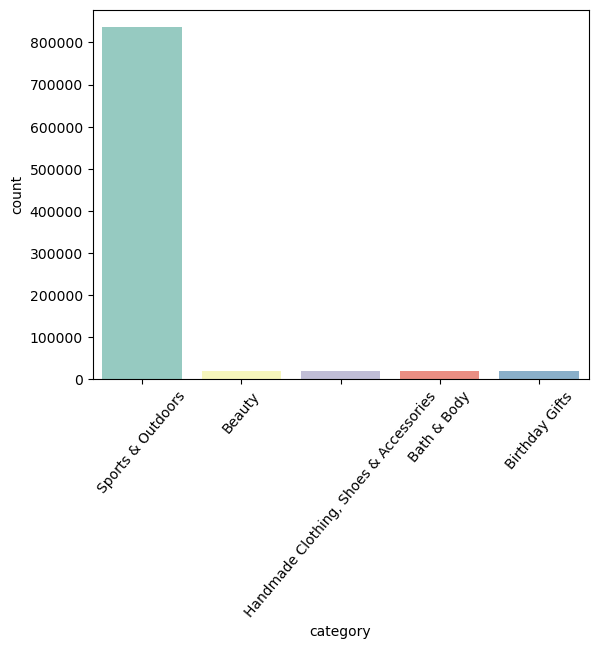

In [7]:
#Display the distribution of products across different categories using a bar chart. 
sns.barplot(x=top5.index, y=top5['count'], palette="Set3")
plt.xticks(rotation=50)
# *If you face problems understanding the chart, do it for a subset of top categories.*


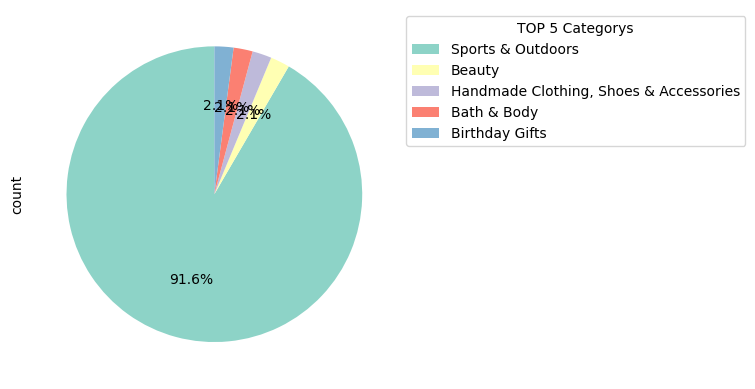

In [8]:
#- For a subset of top categories, visualize their proportions using a pie chart. 
ax = top5['count'].plot.pie(autopct='%1.1f%%', startangle = 90, colors = sns.color_palette("Set3"), labels = ['']*len(top5))
plt.legend(labels=top5.index, title='TOP 5 Categorys',loc="best", bbox_to_anchor = (1,0.5,0.25,0.5))


In [9]:
# Does any category dominate the listings?
proportion_table = df_amazon['category'].value_counts(normalize=True)
print(f"The category that dominates the listing is:")
proportion_table.head(1)

The category that dominates the listing is:


category
Sports & Outdoors    0.342219
Name: proportion, dtype: float64

In [10]:
proportion_table = top5.value_counts
proportion_table

<bound method DataFrame.value_counts of col_0                                    count
category                                      
Sports & Outdoors                       836265
Beauty                                   19312
Handmade Clothing, Shoes & Accessories   19229
Bath & Body                              19092
Birthday Gifts                           18978>

### Part 2: Delving into Product Pricing
How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [11]:
#Calculate the mean, median, and mode for the `price` of products.
mean_value = round(df_amazon['price'].mean(),2)
median_value = df_amazon['price'].median()
mode_value = df_amazon['price'].mode()

print(f"Mean:{round(mean_value,2)}\nMedian:{median_value}\nMode:{mode_value}")

Mean:89.24
Median:19.09
Mode:0    9.99
Name: price, dtype: float64


In [12]:
#What's the average price point of products listed? 
print(f"The Average price for the products listed is {mean_value}$")
# How does this compare with the most common price point (mode)?
#It's much higher than the mode wich we may assume that there may exist outliers that pull the average up.

The Average price for the products listed is 89.24$


### Part 3: Unpacking Product Ratings
How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [13]:
#Calculate the mean, median, and mode for the `rating` of products.
rate_mean = round(df_amazon['stars'].mean(),2)
rate_median = df_amazon['stars'].median()
rate_mode = df_amazon['stars'].mode()

print(f"Average rating is {rate_mean}")
print(f"Median of rating is {rate_median}")
print(f"Mode rating is {rate_mode}")


Average rating is 2.15
Median of rating is 0.0
Mode rating is 0    0.0
Name: stars, dtype: float64


In [14]:
#How do customers generally rate products? 
bins = [0,1,2,3,4,df_amazon['stars'].max()]
labels=('1-unacceptable','2-needs improvement','3-meets expectation','exceeds expectation','5-outstanding')
#df_amazon['Products_rates'] = pd.cut(df_amazon['stars'],bins=bins,labels=labels,include_lowest=True)
Prods_bins = pd.cut(df_amazon['stars'],bins=bins,labels=labels,include_lowest=True)
Prods_table = Prods_bins.value_counts().sort_values(ascending=False)
Prods_table
#Generally customers rate the products poorly with the value "unacceptable"

#Is there a common trend?
#Analysing the measures of centrality for the rating we can infer that the trend will tend to the poor ratings by customers


stars
1-unacceptable         1234125
5-outstanding           965284
exceeds expectation     211623
3-meets expectation      27188
2-needs improvement       5431
Name: count, dtype: int64

In [15]:
#Determine the variance, standard deviation, and interquartile range for product `rating`.
rate_var = round(df_amazon['stars'].var(),2)
rate_std =  round(df_amazon['stars'].std(),2)
q1 = np.percentile(df_amazon['stars'],25)
q3 = np.percentile(df_amazon['stars'],75)
iqr = q3-q1

print(f"The variance is {rate_var},\nstandard deviation is {rate_std}\n and the iqr is {iqr}")

#Are the ratings consistent, or is there a wide variation in customer feedback?
#The ratings are inconsistent.

The variance is 4.82,
standard deviation is 2.19
 and the iqr is 4.4


In [17]:
#Calculate the skewness and kurtosis for the `rating` column. 
skew_value = df_amazon['stars'].skew()
kurtosis_value = df_amazon['stars'].kurtosis()

print(f"The value for skew is {skew_value}")
print(f"The value for kurtosis is {kurtosis_value}")
#Are the ratings normally distributed, or do they lean towards higher or lower values?
#the positive value of skew indicates that the distribution is right skewed This means that the tail on the right side (higher ratings) is longer than the left side (lower ratings) wichs suggests that may exist outliers pulling the mean upwards.
#The negative values of kurtosis indicates that the data distribution has tails that are lighter or less extreme than those of a normal distribution, meaning that extreme values (outliers) are less likely to occur.

The value for skew is 0.08120735761080985
The value for kurtosis is -1.9260061280432985


<Axes: xlabel='count', ylabel='Count'>

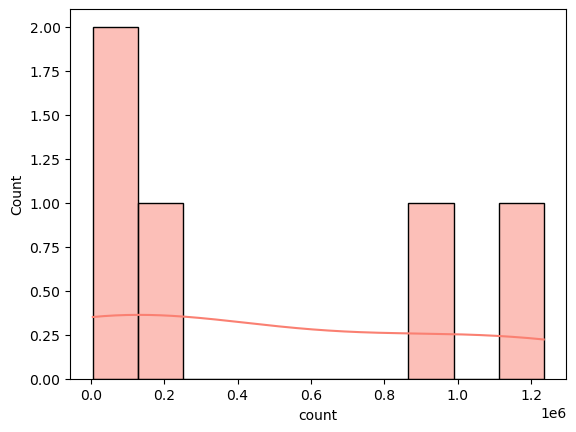

In [ ]:
#Plot a histogram to visualize the distribution of product ratings.
sns.histplot(Prods_table, kde=True, bins=10, color='salmon')
#Is there a specific rating that is more common?